# IMT 573 - Lab 5 - Data Analysis

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Steve Gonzales Collaborators: None

In this module, we have focused on exploring data. Visualization is a great way to do this.

In [an article](https://fivethirtyeight.com/features/women-in-comic-books/) published on fivethirtyeight.com, the authors discuss gender representation in comic books. The data also contains a host of other information about comic book superheros and villans. We will use this dataset in this lab.

The data is split across the two major comic book publishers in the US - DC and Marvel. The urls for each are below. Use these to import the data for each of the publishers into separate dataframes and then combine the two into a larger dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
url_dc = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv"
url_marvel = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv"

In [3]:
dc_data = pd.read_csv(url_dc)
marvel_data = pd.read_csv(url_marvel)

In [4]:
data_all = pd.concat([dc_data, marvel_data])
print(data_all.columns)
data_all.head(3)

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR', 'Year'],
      dtype='object')


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Year
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,NaN
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,NaN
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,NaN


In [5]:
# Look at the nan in Year

# Make a copy
df = data_all.copy()

# Combine the two year columns
df['year'] = df['YEAR'].fillna(df['Year'])

# Count the NaNs
na_count = df['year'].isna().sum()
print(f'{df.shape=}')
print(f'NaN in Year columns {na_count} or {na_count/len(df):.2%}')

df.shape=(23272, 15)
NaN in Year columns 884 or 3.80%


We should watch out for additional missing data. 3.8% could be significant enough to be a problem.

### Problem 1: Inspection

First, inspect the datasets to help you get a sense of what is contained in the data. You can find an overview of the data [here](https://github.com/fivethirtyeight/data/tree/master/comic-characters). What do you notice? Where may there be some issues with the data?

There are two Year columns, 'YEAR' and 'Year'.<p>
There seems to be a lot of superfluous data in the categorical columns, e.g. 'Living Characters' instead of 'Living'.<p>

In [6]:
# GSM has a lot of missing data
na_count = df['GSM'].isna().sum()
print(f'{df.shape=}')
print(f'NaN in GSM columns {na_count} or {na_count/len(df):.2%}')

df.shape=(23272, 15)
NaN in GSM columns 23118 or 99.34%


### Problem 2: Formulate a question

Next, formulate one data science question of interest that can be answered with this dataset. Be sure to comment on why this question in interesting and what you could learn from finding an answer to it.

Data Science Question: There are more female characters in comics in 2010-2013 compared to pre-2010. This would indicate that comics are becoming more diverse. The null hypothesis is that as a proportion of total characters, female characters pre-2010 are a higher percentage than post-2010.<p>
<b>Feedback from prof</b><p>
(-0.1): The null hypothesis can NOT be directional. In other words, the correct way should be following :

Null Hypothesis : There is no difference in the proportion (or number) of female characters between pre-2010 and post-2010.

Alternative hypothesis : The proportion (or number) of female characters pre-2010 is higher than that post-2010.

The p value you got at the end can only be used to reject or (fail to reject) the null hypothesis. We cannot use it to confirm whether the alternative is right or not.

### Problem 3: Data analysis

Next, practice using your data science skills to answer you question. Follow the outlined steps in your data science process.

In [7]:
# Count of rows by year
year_counts = df['year'].value_counts(dropna=True).sort_index()
print(year_counts)

year
1935.0      1
1936.0      9
1937.0      4
1938.0     10
1939.0     87
         ... 
2009.0    528
2010.0    603
2011.0    504
2012.0    206
2013.0    168
Name: count, Length: 79, dtype: int64


#### (a) Try the easy solution first

After filtering any anomolous values, try using descriptive statistics to see if you can get a general sense of the answer to your question.

In [8]:
df = data_all.copy()
# Combine the two year columns
df['year'] = df['YEAR'].fillna(df['Year'])
# Clean up the sex column to make it more straightforward
df['sex'] = df['SEX'].str.replace(' Characters', '', regex=False)
# Look at the average female % in the two time periods
df['time_period'] = df['year'].apply(lambda year: 'pre-2010' if year < 2010 else '2010-2013' if 2010 <= year <= 2013 else None)
na_count = df['year'].isna().sum()
print(f"Bad year rows as a % of total: {na_count/len(df):%}")

# Get counts of time_period
df_total = df.groupby('time_period')['sex'].count()

# Group by female and not female to get the percentage for each period
df_female = df[df['sex'] == 'Female'].groupby('time_period')['sex'].count()

# Calculate the percentage of female characters in each time period
df_ratio = (df_female / df_total).reset_index()

# Get the percentages
p1 = df_ratio[df_ratio['time_period'] == 'pre-2010'].iloc[0][1]
p2 = df_ratio[df_ratio['time_period'] == '2010-2013'].iloc[0][1]

# Print the percentages
print(f"pre-2010 percentage of female characters: {p1:%}")
print(f"2010-2013 percentage of female characters: {p2:%}")
print(" ")
if p1 < p2:
    print("There are more Female characters post 2010; Null hypothesis is false.")
else:
    print("There are fewer Female characters post 2010 compared to pre-2010; Null hypothesis is true.")

Bad year rows as a % of total: 3.798556%
pre-2010 percentage of female characters: 25.588705%
2010-2013 percentage of female characters: 31.298246%
 
There are more Female characters post 2010; Null hypothesis is false.


#### (b) Check distributions

Look at distribution(s) of your data to determine if there are any patterns that are evident with respect to your question of interest.

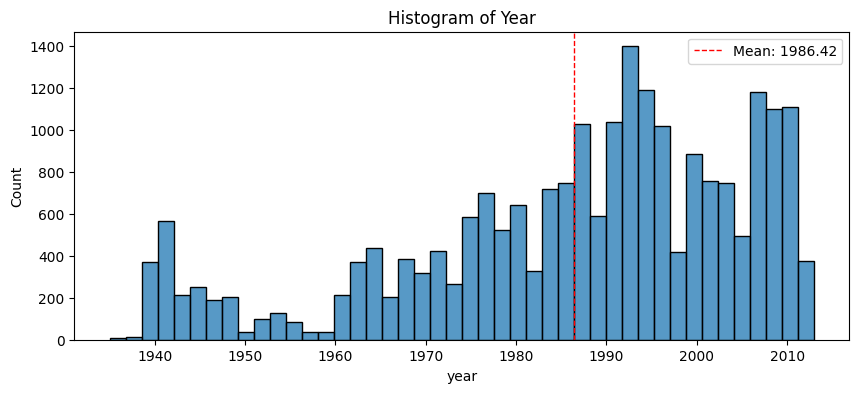

In [9]:
# Look at Histogram by Year for all data
plt.figure(figsize=(10, 4))
mean_year = df['year'].mean()

# Add a vertical line for the mean
plt.axvline(mean_year, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_year:.2f}')  # Added line

sns.histplot(df['year'].dropna())
plt.title(f'Histogram of Year')
plt.legend()
plt.show()

This distribution looks normal as comics have steadily grown in popularity with blockbuster movies.

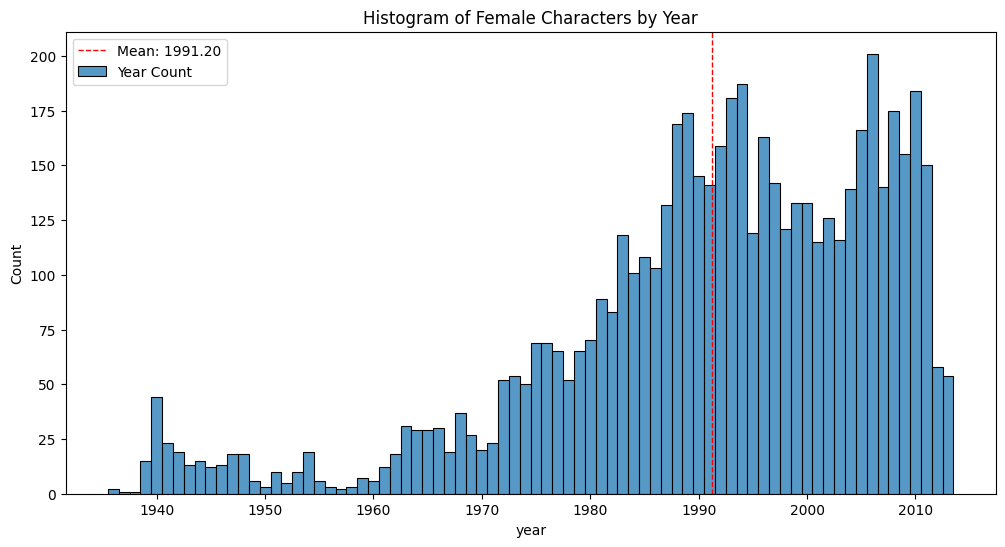

In [10]:
# Look at Histogram by Year for female data
df_female = df.copy()
df_female = df_female[df_female['sex'] == 'Female']  # Filter for female characters

# Plot the histogram and moving average
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization

sns.histplot(df_female['year'].dropna(), discrete=True, label='Year Count')  # Label the histogram

# Add a vertical line for the mean
mean_year = df_female['year'].mean()
plt.axvline(mean_year, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_year:.2f}')  # Added line

plt.title(f'Histogram of Female Characters by Year')
plt.legend()
plt.show()

This distribution is skewed to the right indicating that our alternate hypothesis is correct, ie more female characters as time goes on.<p>
However, the last few years of data trails off significantly; it does follow the total row count histogram.

#### (c) What's next?

Considering what you've learned during this module, what could be additional steps to take to answer your question? Are there any potential issues with these steps? (In this case, it is perfectly acceptable to note issues without providing potential solutions).

Next we should sample the data to see if p-value is below the significance level. This will allow us to prove that the Null Hypothesis is False. Even if the p-test shows that the alternative hypotheis is true, it could still be wrong.

N: 22,388
Z-statistic: 4.749716354922744
P-value: 0.00000102
Reject the null hypothesis. There is evidence of a statistically significant difference in the proportion of female characters between the two time periods.


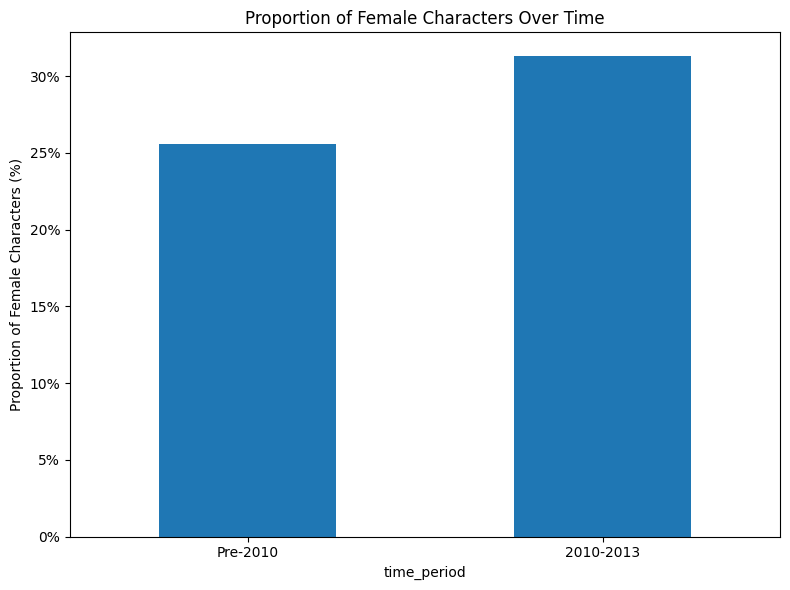

In [11]:
# Determine if Null Hypothesis is true or not by calculating p-value
# Define the groups
df_female = df.copy()
df_female = df_female[df_female['sex'] == 'Female']  # Filter for female characters

# Define the time periods
df['time_period'] = df['year'].apply(lambda year: 'pre-2010' if year < 2010 else '2010-2013' if 2010 <= year <= 2013 else None)
df_female['time_period'] = df_female['year'].apply(lambda year: 'pre-2010' if year < 2010 else '2010-2013' if 2010 <= year <= 2013 else None)

#Remove rows with no time_period
df = df.dropna(subset=['time_period'])
df_female = df_female.dropna(subset=['time_period'])

# Calculate proportions (using the corrected filter for female characters)
total_counts = df.groupby('time_period')['sex'].count()
female_counts = df_female.groupby('time_period')['sex'].count()
female_proportions = female_counts / total_counts

# Perform the proportion test (two-sample z-test for proportions)
n1 = total_counts['pre-2010']
x1 = female_counts['pre-2010']
n2 = total_counts['2010-2013']
x2 = female_counts['2010-2013']

if n1 > 0 and n2 > 0: # Check to avoid division by zero
    # x: The number of "successes" (e.g., female characters) in each group (e.g., pre-2010).
    # n: The total number of observations in each group.
    # p: The proportion of "successes" in each group. 
    p1 = x1 / n1
    p2 = x2 / n2
    p = (x1 + x2) / (n1 + n2)

    # The z-statistic. The test statistic for a two-sample z-test for proportions. 
    # It measures how far apart the two sample proportions (p1 and p2) are, in terms of std errors
    z = (p2 - p1) / np.sqrt(p * (1 - p) * (1/n1 + 1/n2))
    p_value = 1 - stats.norm.cdf(abs(z))  # One-sided test (H1: proportion increased)

    print(F"N: {len(df):,}")
    print(f"Z-statistic: {z}")
    print(f"P-value: {p_value:.8f}")

    # 0.05 Significance or Alpha level was popularized by statisticians like R.A. Fisher in the early days of statistical hypothesis testing.
    #It became a sort of "default" value, partly because it was often easier to calculate critical values for this level by hand using statistical tables.
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is evidence of a statistically significant difference in the proportion of female characters between the two time periods.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence to suggest a statistically significant difference.")
else:
    print("Not enough data for one or both time periods to perform a hypothesis test.")


# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plot_order = ['pre-2010', '2010-2013']

if n1 > 0 and n2 > 0: # Check to avoid plotting errors
    # Plot each % of proportions
    female_proportions.loc[plot_order].plot(kind='bar', ax=ax)

    ax.set_ylabel('Proportion of Female Characters (%)')
    ax.set_title('Proportion of Female Characters Over Time')

    # Format y-axis as percentages
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x*100)))
    ax.set_xticklabels(['Pre-2010', '2010-2013'], rotation=0)

    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for one or both time periods to create a plot.")